# Work in Progress.... :)

# IMDB
IMDb is the world's most popular and authoritative source for movie, TV and celebrity content. Find ratings and reviews for the newest movie and TV shows.

Data Source: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

<img src="imdb1.jpg" alt="drawing" width="1000" height="100" align = "left">

# Objectives

- Perform Feature Engineering, clean, wraggling and tidy then save the new dataset in a .csv file. The new file will be use in machine learning model, KNN and Decision Tree.




Data Dictionary:
- `Poster_Link` - Link of the poster that imdb using
- `Series_Title` = Name of the movie
- `Released_Year` - Year at which that movie released
- `Certificate` - Certificate earned by that movie
- `Runtime` - Total runtime of the movie
- `Genre` - Genre of the movie
- `IMDB_Rating` - Rating of the movie at IMDB site
- `Overview` - mini story/ summary
- `Meta_score` - Score earned by the movie
- `Director` - Name of the Director
- `Star1,Star2,Star3,Star4` - Name of the Stars
- `Noofvotes` - Total number of votes
- `Gross` - Money earned by that movie

# Import Packages and Load Data

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
# define training points and training labels
df_new = pd.read_csv('imdb_top_1000_clean.csv')
print(df_new.shape)
df_new.head(2)

(1000, 15)


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,0,Dark Waters,2019.0,PG-13,126,"Biography, Drama, History",7.6,73.0,Todd Haynes,Mark Ruffalo,Anne Hathaway,Tim Robbins,Bill Pullman,60408,6.212517e+07
1,1,Searching,2018.0,U/A,102,"Drama, Mystery, Thriller",7.6,71.0,Aneesh Chaganty,John Cho,Debra Messing,Joseph Lee,Michelle La,140840,2.602096e+07


## K Nearest Neighbor

We will classify our movie if it's good or bad.

First let's create a new column that has as a 1 value if IMDB_Rating is equal or higher than 8 otherwise 0.

In [4]:
df_new['good_bad'] = 0
# df_new['good_bad'][df_new['IMDB_Rating'] > 8.0 ] = 1

# use this code for 1's
df_new['good_bad'][df_new.IMDB_Rating.isin([8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8,
                                            8.9, 9. , 9.2, 9.3])] = 1

In [5]:
# checking proportion of good and bad movies
df_new['good_bad'].value_counts()

0    537
1    463
Name: good_bad, dtype: int64

In [6]:
# classifier instance
classifier = KNeighborsClassifier(n_neighbors = 5)

In [7]:
# define training points and training labels
training_points = df_new[['Gross', 'Runtime', 'Released_Year', 'Meta_score', 'IMDB_Rating', 'No_of_Votes']]
training_labels = df_new['good_bad']

In [8]:
# Training data
x_train, x_test, y_train, y_test = train_test_split(training_points, training_labels,  test_size = 0.7, random_state = 42)

In [9]:
# Normalize our training point(x)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
# fitting training data
classifier.fit(x_train, y_train)

KNeighborsClassifier()

#### Visialize K-value's

Text(0.5, 1.0, 'Zoom in')

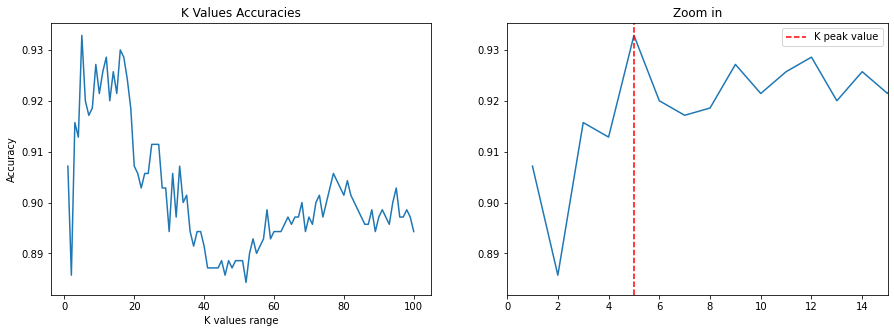

In [11]:
# show graph
accuracies = []
k_list = range(1,101)  

for k in range(1,101):
   classifier = KNeighborsClassifier(n_neighbors = k)
   classifier.fit(x_train, y_train)
   accuracies.append(classifier.score(x_test, y_test))

plt.figure(figsize=(15, 5)) 

ax1 = plt.subplot(1,2,1)
plt.plot(k_list, accuracies)
plt.title('K Values Accuracies')
plt.xlabel('K values range')
plt.ylabel('Accuracy')

ax2 = plt.subplot(1,2,2)
plt.plot(k_list, accuracies)
plt.axvline(5, color = 'r', linestyle = '--', label = 'K peak value')
plt.legend()
plt.xlim(0,15)
plt.title('Zoom in')

# Testing our model

In [14]:
# make sure it is not in our dataset, we dont want the neighbor to be itself
# Movies sample
Spiderman = [[1800000000, 148, 2021, 71, 83, 697614]]
badmovie_sample = [[180000, 3, 1920, 7, 7, 5000]]

# Normalize our movie sample
Spiderman = scaler.transform(Spiderman)
badmovie_sample  = scaler.transform(badmovie_sample)

In [24]:
# Test result
print(classifier.predict(Spiderman))
print(classifier.predict(badmovie_sample))

[1]
[0]


# K-NEAREST NEIGHBOR REGRESSOR
 Instead of classifying a new movie as either good or bad, we are now going to predict its IMDb rating as a real number.

In [25]:
# KNN Regression instance
# weight distance is more accurate
regr = KNeighborsRegressor(n_neighbors = 13, weights = 'distance')

In [26]:
# Set IMDB Rating as our new training label
training_labels2 = df_new['IMDB_Rating']

# Training data
x_train2, x_test2, y_train2, y_test2 = train_test_split(training_points, training_labels2,  test_size = 0.2, random_state = 42)

In [27]:
# Fit training data
regr.fit(x_train2, y_train2)

KNeighborsRegressor(n_neighbors=13, weights='distance')

#### Testing

regression for bad movies seems off. Can we do better?

`Pending`
- Use feature selection to improve our regression model

In [28]:
# Note: Spiderman values are normalized
print(regr.predict(Spiderman))
print(regr.predict(badmovie_sample))

[7.95370096]
[7.95369507]


# Model Evaluation
- `Mean Squared Error`: Averaged of the squared error of the difference between the actual and predicted values (higher = better)
- `R2`: The corelation between the dependent variable and the set of independent variables (higher = better)


### Classification

In [29]:
y_predict = cross_val_predict(classifier, x_test, y_test, cv=5)

In [30]:
from math import sqrt
sqrt(mean_squared_error(y_test, y_predict))

0.37984959429452375

In [31]:
r2_score(y_test, y_predict)

0.4159727729315359

### Regression

In [32]:
y_predict2 = cross_val_predict(regr, x_test2, y_test2, cv=5)
# note: y_test2 is the actual rating while y_predict2 is our predicted IDMB rating

In [33]:
sqrt(mean_squared_error(y_test2, y_predict2))

0.2976213235335613

In [34]:
r2_score(y_test2, y_predict2)

-0.08154398317300093

### Can we do better?
Both Classification and Regression has very lower score, lets do some feature engineering to select better training labels for both models

# Work in Progess...